In [119]:
# 2nd Day Close Price crossing 9D Moving Average
# In the following script we will test a strategy where
# we will be buying when the close price crosses the 9D moving average
# two times in a row and sell when vice versa

In [120]:
# importing libraries as always:)
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
%matplotlib inline

In [121]:
# getting the data
ticker = ['ADA-USD']
start_date = '2020-01-01'
ada_data = pdr.get_data_yahoo(ticker, start_date)

In [122]:
# modify the dataframe
ada_data = ada_data.drop('Adj Close', axis = 1)
ada_data = round(ada_data, 2)

In [123]:
# check
ada_data.tail(3)

Attributes,Close,High,Low,Open,Volume
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD
Date,,,,,
2021-05-24,1.56,1.65,1.44,1.55,5.723131e+09
2021-05-25,1.78,1.83,1.55,1.55,6.638876e+09
2021-05-27,1.70,1.78,1.62,1.78,4.489897e+09


In [124]:
# calculating log change
ada_data['Change'] = np.log(ada_data['Close']/ada_data['Close'].shift())
# calculating the 2 day moving average
ada_data['2D P'] = ada_data['Close'].rolling(2).sum().shift()
# calculating the 9 day moving average
ada_data['9D MA'] = ada_data['Close'].rolling(9).mean().shift()
# check
ada_data.tail(3)

Attributes,Close,High,Low,Open,Volume,Change,2D P,9D MA
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,,,
Date,,,,,,,,
2021-05-24,1.56,1.65,1.44,1.55,5.723131e+09,0.006431,2.88,1.724444
2021-05-25,1.78,1.83,1.55,1.55,6.638876e+09,0.131928,3.11,1.641111
2021-05-27,1.70,1.78,1.62,1.78,4.489897e+09,-0.045985,3.34,1.613333


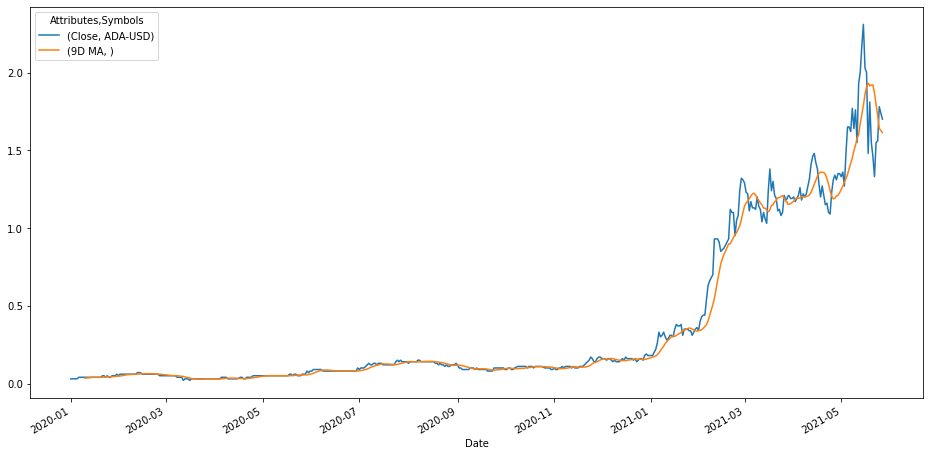

In [125]:
# plotting
ada_data[['Close', '9D MA']].plot(figsize=(16, 8));

In [131]:
# once the close price crosses above the 9D MA two times in a row
# going long on ada
ada_data['Position'] = np.where(ada_data['2D P'] > ada_data['9D MA'], 1, 0)

# once the close price crosses below the 9D MA two times in a row
# going short on ada
ada_data['Position'] = np.where(ada_data['2D P'] < ada_data['9D MA'], -1, ada_data['Position'])

In [127]:
# tracking performance
ada_data['System'] = ada_data['Position']* ada_data['Change']

In [128]:
# checkout
ada_data.tail(3)

Attributes,Close,High,Low,Open,Volume,Change,2D P,9D MA,Position,System
Symbols,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,,,,,
Date,,,,,,,,,,
2021-05-24,1.56,1.65,1.44,1.55,5.723131e+09,0.006431,2.88,1.724444,1,0.006431
2021-05-25,1.78,1.83,1.55,1.55,6.638876e+09,0.131928,3.11,1.641111,1,0.131928
2021-05-27,1.70,1.78,1.62,1.78,4.489897e+09,-0.045985,3.34,1.613333,1,-0.045985


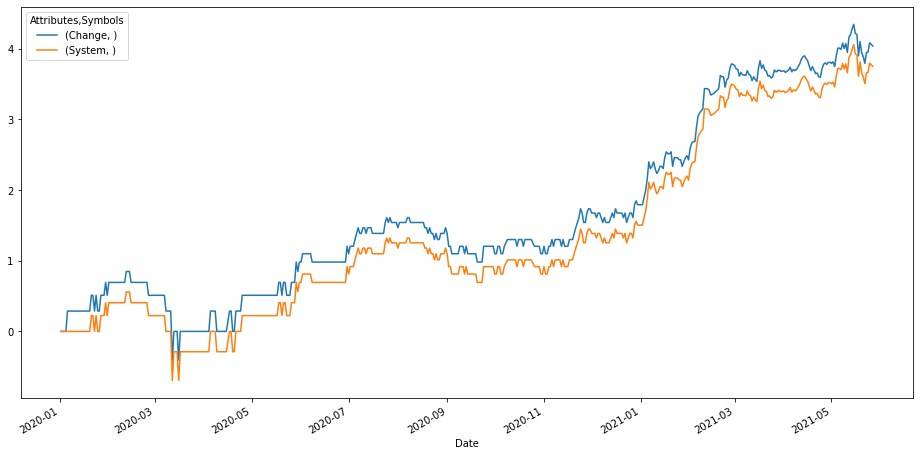

In [129]:
# testing the system vs a buy and hold approach
ada_data[['Change', 'System']].cumsum().plot(figsize=(16, 8));

In [130]:
# conclusion:
# looks like simply buying and holding ada would have yield 
# a higher return than the system